In [113]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

In [6]:
flights = pd.read_csv("flights_converted.xls")

In [188]:
flights

,Unnamed: 0,airline,DEPARTURE_DELAY,ARRIVAL_DELAY,date
0,695436,AA,-2.0,-4.0,2015-02-16
1,695437,DL,-6.0,-15.0,2015-02-16
2,695438,DL,5.0,24.0,2015-02-16
3,695439,US,-2.0,-19.0,2015-02-16
4,695440,AA,0.0,-6.0,2015-02-16
5,695441,NK,39.0,40.0,2015-02-16
6,695442,US,-5.0,4.0,2015-02-16
7,695443,AA,42.0,32.0,2015-02-16
8,695444,AA,-7.0,-6.0,2015-02-16
9,695445,DL,0.0,-7.0,2015-02-16


In [7]:
twitter = pd.read_csv("twitter_converted.xls")

AA


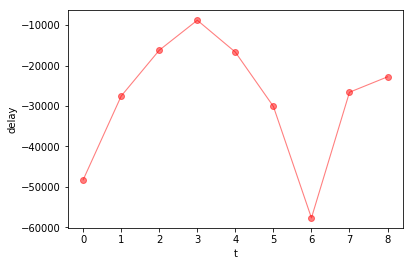

AS


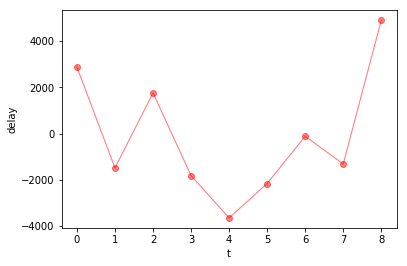

B6


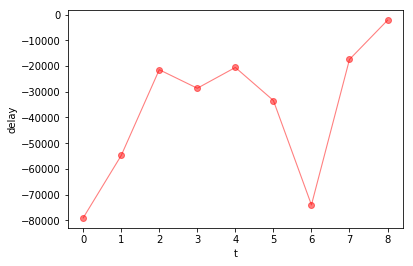

DL


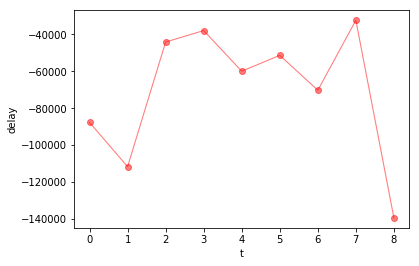

EV


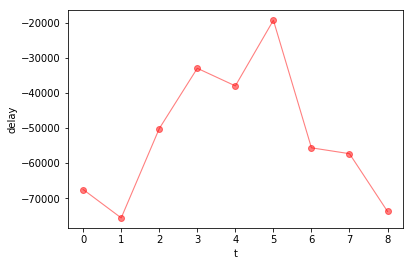

F9


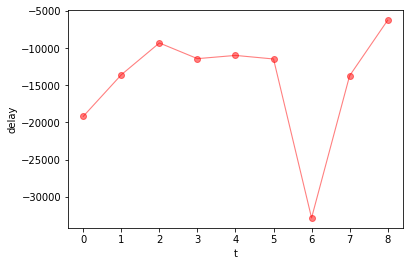

HA


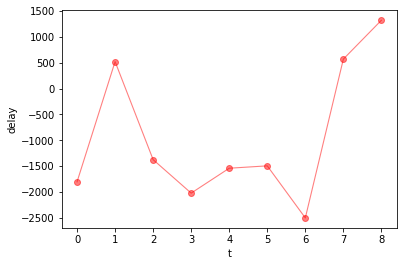

MQ


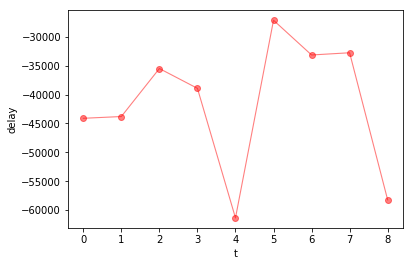

NK


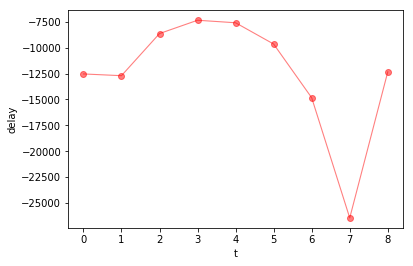

OO


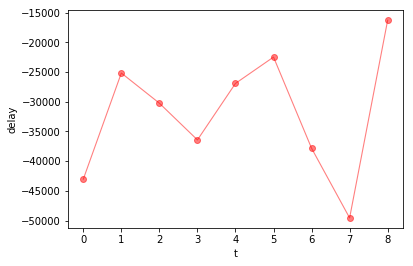

UA


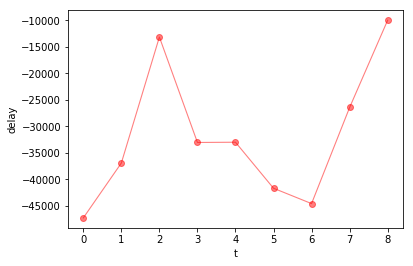

US


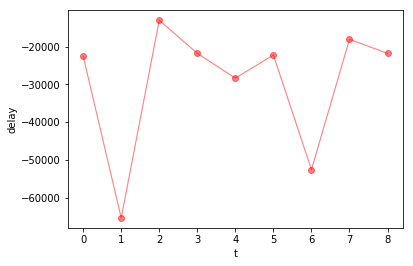

VX


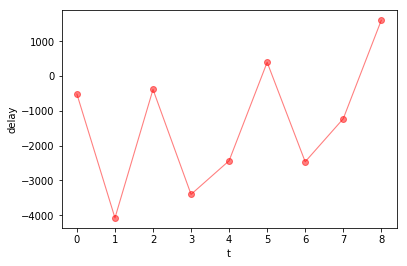

In [185]:

a = []
b = []
airline = 'AA'
for group_name, df_group in flights.groupby(['airline','date']):
    #print(group_name[0])
    if(airline != group_name[0]):
        print(airline)
        plt.plot(a,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
        plt.xlabel('t')
        plt.ylabel('delay')
        plt.show() 
        airline = group_name[0]
        a = []
    #print(format(group_name))
    delay = 0
    for row_index, row in df_group.iterrows():
        col = row['DEPARTURE_DELAY']
        col2 = row['ARRIVAL_DELAY']
        if not pd.isnull(col) | pd.isnull(col2):
            delay += -1*(col + col2)
        #print(col, col2)
    #print(delay)
    a.append(delay)
    b.append(group_name)
    
#print(a)
#print(b)
    

In [ ]:
plt.plot(a,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show() 

In [186]:
twitter

,Unnamed: 0,airline_sentiment,airline,date
0,0,neutral,VX,2015-02-24
1,1,positive,VX,2015-02-24
2,2,neutral,VX,2015-02-24
3,3,negative,VX,2015-02-24
4,4,negative,VX,2015-02-24
5,5,negative,VX,2015-02-24
6,6,positive,VX,2015-02-24
7,7,neutral,VX,2015-02-24
8,8,positive,VX,2015-02-24
9,9,positive,VX,2015-02-24


In [187]:
for group_name, df_group in twitter.groupby(['airline','date']):
    print(group_name,df_group)

    delay = 0
    for row_index, row in df_group.iterrows():
        col = row['DEPARTURE_DELAY']
        col2 = row['ARRIVAL_DELAY']
        if not pd.isnull(col) | pd.isnull(col2):
            delay += -1*(col + col2)

('AA', '2015-02-18')        Unnamed: 0 airline_sentiment airline        date
12037       12037          negative      AA  2015-02-18
('AA', '2015-02-19')        Unnamed: 0 airline_sentiment airline        date
12036       12036          positive      AA  2015-02-19
('AA', '2015-02-20')        Unnamed: 0 airline_sentiment airline        date
12035       12035          negative      AA  2015-02-20
('AA', '2015-02-21')        Unnamed: 0 airline_sentiment airline        date
12034       12034          negative      AA  2015-02-21
('AA', '2015-02-22')        Unnamed: 0 airline_sentiment airline        date
12028       12028          negative      AA  2015-02-22
12029       12029          negative      AA  2015-02-22
12030       12030          negative      AA  2015-02-22
12031       12031          negative      AA  2015-02-22
12032       12032          negative      AA  2015-02-22
12033       12033          positive      AA  2015-02-22
13658       13658          negative      AA  2015-02-22